In [ ]:
import sqlite3
import pandas as pd
import numpy as np

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
fundamentals = pd.read_sql_query("SELECT * FROM Fundamental_Factors", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
stats1 = pd.read_sql_query("SELECT * FROM stats1", db)

In [ ]:
stats1.head()
stats1.columns
days_diff = stats1['Days_diff']
del(stats1['Days_diff'])
stats1.rename(columns={'Transaction_Price':'Price', 'Transaction_Volume':'Volume',
       'Transaction_$' : 'Amount', 'Comp':'Short'}, inplace = True)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
stats2 = pd.read_sql_query("SELECT * FROM stats2", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
stats3 = pd.read_sql_query("SELECT * FROM stats3", db)

In [ ]:
stats3.columns
stats3_correlation = stats3['Correlation']
del stats3['Correlation']
stats3.head()

In [ ]:
# Re-indexing Stats
cum_vol_and_prices = pd.concat([prices_ratio,cum_vol], axis =1)
stats_combined = pd.concat([stats1,stats2, stats3])
del(stats_combined['Day Prior'])
stats_combined = stats_combined.reindex_axis(['Stock', 'Date', 'Price', 'Volume', 'Amount', 'Short', 'Adj_Date',
       'Week_day', 'Day_Prior', 'Recent_Date', 'Day_Prior_Deal_Ratio'], axis=1)

In [ ]:
# Setting a few values
stats_combined.loc['PE', 'Price'] = '21.37'
stats_combined.loc['PE', 'Amount']= '438.08'
stats_combined.loc['PE','Day_Prior_Deal_Ratio'] = '0.94767184'

stats_combined.loc['SRC', 'Price'] = '11.50'
stats_combined.loc['SRC', 'Amount']= '34.5'
stats_combined.loc['SRC','Day_Prior_Deal_Ratio'] = '1.003'

In [ ]:
stats_combined = pd.read_csv("combined_stats.csv")

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
stats_combined.to_sql('stats_combined2', db)

In [ ]:
stats_combined.index = stats_combined['Stock']
del(stats_combined['Stock'])
stats_combined

In [ ]:
import pandas as pd
fundamentals = pd.read_csv("Regression_Project_Fundamental_Factors.csv")

fundamentals.index = fundamentals['Company']
del(fundamentals['Company'])
dpdr = stats_combined['Day_Prior_Deal_Ratio']
fundamentals['pricing_ratio'] = dpdr

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
fundamentals.to_sql('fundamentals', db)

In [ ]:
for i, j in added_mcaps.items():
    fundamentals.loc[i, 'market_cap'] = j
for i, j in added_ebitdas.items():
    fundamentals.loc[i, 'ebitda '] = j    

In [ ]:
dpdr=stats_combined['Day_Prior_Deal_Ratio']

In [ ]:
fundamentals['pricing_ratio'] = dpdr

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
cum_vol_prices1 = pd.read_sql_query("SELECT * FROM cum_vol_and_comps1", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
cum_vol_prices2 = pd.read_sql_query("SELECT * FROM cum_vol_and_comps2", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
cum_vol_prices3 = pd.read_sql_query("SELECT * FROM cum_vol_and_prices3", db)

In [ ]:
cum_vol_prices1.to_csv("cum_vol_prices1.csv")
cum_vol_prices2.to_csv("cum_vol_prices2.csv")
cum_vol_prices3.to_csv("cum_vol_prices3.csv")

In [62]:
spread_ratios = pd.read_csv("spread_ratios.csv")
spread_ratios.replace('', np.nan, inplace=True)
spread_ratios.replace(' ', np.nan, inplace=True)
spread_ratios.index= spread_ratios['Vol_index']
del(spread_ratios['Vol_index'])
spread_ratios2 = spread_ratios.T.sort_index()
spread_ratios= spread_ratios2.T
spread_ratios.head()

,ADMS,ADPT,AKS,AM,AR,ASC,BNCN,CARA,COG,CPE,...,SRC,STKL,SWN,SYRG,TRVN,TTI,TTOO,TXMD,WGP,ZGNX
Vol_index,,,,,,,,,,,,,,,,,,,,,
0.0,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,1.07,1.06,0.88,1.01
0.1,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,1.07,1.06,0.88,1.01
0.2,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,0.96,1.06,0.88,0.93
0.3,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.06,0.91,1.06,1.13,0.88,0.89,1.06,0.88,0.93
0.4,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.06,0.91,1.06,1.13,0.88,0.89,1.06,0.88,0.93


In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
spread_ratios.to_sql('spread_ratios', db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
fundamentals = pd.read_sql_query("SELECT * FROM fundamentals", db)

In [64]:
for i in spread_ratios.index:
    for col in spread_ratios.columns:
        try:
            tmp = float(spread_ratios.ix[i][col])
        except Exception:
            print(i, col)

In [66]:
for col in spread_ratios.columns:
    spread_ratios[col]= spread_ratios[col].astype('float')    

In [ ]:
spread_ratios.mean(axis=1)

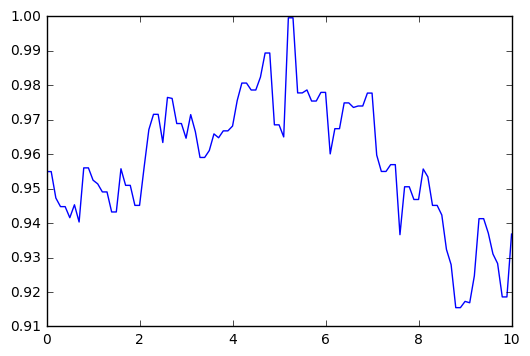

In [68]:
#  GRAPHING spread_ratios MEAN VALUES 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(spread_ratios.mean(axis=1))

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
prices = pd.read_sql_query("SELECT * FROM prices", db)

In [ ]:
prices.head()
prices.index=prices['Date']
del(prices['index'])

In [ ]:
# ADDED A FEW COMPANIES
prices_added = pd.read_csv('prices_added.csv')

In [ ]:
prices_added = prices_added.T
prices_added_no_date = prices_added.T
prices_added_t = prices_added_no_date.T              
prices_added_t.head()
prices_added_t.index = prices.index
del prices_added_t['Date']
prices_added_t.index

In [ ]:
combined = pd.concat([prices,prices_added_t], axis =1)
combined= combined[:235]
combined.head()

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
prices = pd.read_sql_query("SELECT * FROM prices3", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
prices3.to_sql('prices3.csv', db)

In [ ]:
pricess.to_csv('prices2.csv')
prices3.to_csv('prices3.csv')

In [ ]:
# Ran Correlations in R (using 'cor' function) and uploading here
cor1= pd.read_csv('prices1_correlations.csv')
cor2= pd.read_csv('prices2_correlations.csv')
cor3= pd.read_csv('prices3_correlations.csv')

In [38]:
cor1.index = cor1['Unnamed: 0']
del(cor1['Unnamed: 0'])
cor1.head()

,AKS,AM,COG,CPE,D,DVN,EQT,ESV,FOXF,GIG,...,SWN,SYRG,WGP,USO,SPY,TAST,INCR,LSCC,X,AEP
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AKS,1.000000,0.787691,0.819244,0.698459,0.853278,0.299200,0.775514,-0.517375,0.485536,-0.577764,...,0.722270,-0.382024,0.424975,-0.084971,0.770410,0.324015,-0.047979,0.446237,0.973423,0.869076
AM,0.787691,1.000000,0.846959,0.868504,0.792057,0.605419,0.824469,-0.345404,0.665248,-0.722760,...,0.828030,-0.187433,0.607231,0.228763,0.831865,0.101435,-0.093700,0.409712,0.797006,0.700606
COG,0.819244,0.846959,1.000000,0.759103,0.832506,0.434487,0.944150,-0.500593,0.436612,-0.639457,...,0.860648,-0.327464,0.508787,0.130247,0.690277,0.363791,-0.235351,0.168409,0.822533,0.796210
CPE,0.698459,0.868504,0.759103,1.000000,0.673037,0.711448,0.720874,-0.344937,0.801094,-0.611106,...,0.836417,-0.171424,0.634076,0.232936,0.896517,0.087716,0.129012,0.467709,0.741584,0.593327
D,0.853278,0.792057,0.832506,0.673037,1.000000,0.262977,0.812884,-0.647289,0.418530,-0.650485,...,0.707302,-0.476007,0.270702,-0.153388,0.659782,0.298757,-0.331384,0.279280,0.848918,0.913541


In [22]:
db = sqlite3.connect("prices_csv.sqlite")

stats1= pd.read_sql_query("SELECT * FROM stats1", db)
stats2 = pd.read_sql_query("SELECT * FROM stats2", db)
stats3 = pd.read_sql_query("SELECT * FROM stats3", db)

In [29]:
stats1.index= stats1['Stock']
del (stats1['Stock'])

In [31]:
stats1.head()
#stats1['Comp']

,Date,Transaction_Price,Transaction_Volume,Transaction_$,Comp,Adj_Date,Week_day,Day_Prior,Recent_Date,Days_diff,Day_Prior_Deal_Ratio
Stock,,,,,,,,,,,
AKS,4/29/16,4.40,59.8,263.1,X,2016-04-29 00:00:00,4,2016-04-28 00:00:00,9/21/16,146 days,0.881764
AM,3/24/16,22.40,8.2,183.7,CPE,2016-03-24 00:00:00,3,2016-03-23 00:00:00,9/21/16,182 days,0.914711
COG,2/23/16,20.00,50.6,1012.0,EQT,2016-02-23 00:00:00,1,2016-02-22 00:00:00,9/21/16,212 days,0.930021
CPE,3/4/16,6.52,15.2,99.0,PE,2016-03-04 00:00:00,4,2016-03-03 00:00:00,9/21/16,202 days,0.953216
D,4/5/16,73.53,10.2,750.0,AEP,2016-04-05 00:00:00,1,2016-04-04 00:00:00,9/21/16,170 days,1.004953


In [39]:
comp_bucket1 = {}
for i in stats1.index:
    comp1 = stats1.loc[i,'Comp']   
    comp_bucket1[i] = cor1.loc[i, comp1]
comp_bucket1

{'AKS': 0.9734225726513609,
 'AM': 0.86850359388190512,
 'COG': 0.94415035540026393,
 'CPE': 0.94265834219247202,
 'D': 0.91354063172689692,
 'DVN': 0.87858146224330003,
 'EQT': 0.84971530580742705,
 'ESV': 0.90311483341570298,
 'FOXF': 0.82767895895558596,
 'GIG': -0.16293953592112698,
 'GPOR': 0.84971530580742705,
 'HES': 0.866140019487735,
 'MTDR': 0.87858146224330003,
 'PE': 0.94265834219247202,
 'PRAH': 0.58756389472299297,
 'QEP': 0.91400986664058204,
 'SABR': 0.56119781783757794,
 'SE': 0.92859106939392999,
 'SPWH': 0.28148893895591304,
 'SRC': 0.92859106939392999,
 'SWN': 0.90681194258006004,
 'SYRG': 0.90311483341570298,
 'WGP': 0.86001865595225702}

In [42]:
combined_correlation = {**comp_bucket1, **comp_bucket2, **comp_bucket3}

In [44]:
comp_df = pd.DataFrame.from_dict(combined_correlation, orient="index")

In [56]:
spread_ratios.head()

,ADMS,ADPT,AKS,AM,AR,ASC,BNCN,CARA,COG,CPE,...,SRC,STKL,SWN,SYRG,TRVN,TTI,TTOO,TXMD,WGP,ZGNX
Vol_index,,,,,,,,,,,,,,,,,,,,,
0.0,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,1.07,1.06,0.88,1.01
0.1,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,1.07,1.06,0.88,1.01
0.2,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,0.96,1.06,0.88,0.93
0.3,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.06,0.91,1.06,1.13,0.88,0.89,1.06,0.88,0.93
0.4,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.06,0.91,1.06,1.13,0.88,0.89,1.06,0.88,0.93


In [53]:
fundamentals['Comp_Cor'] = comp_df[0]

In [286]:
db = sqlite3.connect("prices_csv.sqlite")
fundamentals.to_sql('fundamentals_', db)
fundamentals.head()

,market_cap,editda,day_prior_dr,comp_cor,ror
Company,,,,,
ADMS,0.38883,-0.06258,0.889346,0.141616,-13.333333
ADPT,0.02705,0.03754,0.867133,NaN,1.470588
AKS,2.20000,0.60280,0.881764,0.973423,-21.568627
AM,6.16000,0.37060,0.914711,0.868504,-6.410256
AR,7.00000,-0.09816,0.971029,0.735561,-4.854369


In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
#fundamentals.to_sql('Fundamental_Factors', db)
fundamentals = pd.read_sql_query("SELECT * FROM fundamentals", db)

In [ ]:
fundamentals.index= fundamentals['Company']
del(fundamentals['Company'])

In [ ]:
Day_Prio_DR = pd.read_csv('Day_Prio_DR.csv')

In [ ]:
Day_Prio_DR.index= Day_Prio_DR['Stock']
del (Day_Prio_DR['Stock'])

In [ ]:
fundamentals['Company']= Day_Prio_DR

In [173]:
fundamentals = fundamentals.rename(columns={'Day_Prior_DR': 'day_prior_dr'})
fundamentals = fundamentals.rename(columns={'Comp_Cor': 'comp_cor'})

In [283]:
db = sqlite3.connect("prices_csv.sqlite")
spread_ratios.to_sql('spread_ratios', db)

In [138]:
spread_ratios.head()

,ADMS,ADPT,AKS,AM,AR,ASC,BNCN,CARA,COG,CPE,...,SRC,STKL,SWN,SYRG,TRVN,TTI,TTOO,TXMD,WGP,ZGNX
Vol_index,,,,,,,,,,,,,,,,,,,,,
0.0,0.76,0.85,0.9,0.86,0.99,0.87,1.0,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,1.07,1.06,0.88,1.01
0.1,0.76,0.85,0.9,0.86,0.99,0.87,1.0,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,1.07,1.06,0.88,1.01
0.2,0.76,0.85,0.9,0.86,0.99,0.87,1.0,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,0.96,1.06,0.88,0.93
0.3,0.76,0.85,0.9,0.86,0.99,0.87,1.0,1.03,0.97,1.018,...,0.96,1.06,0.91,1.06,1.13,0.88,0.89,1.06,0.88,0.93
0.4,0.76,0.85,0.9,0.86,0.99,0.87,1.0,1.03,0.97,1.018,...,0.96,1.06,0.91,1.06,1.13,0.88,0.89,1.06,0.88,0.93


In [170]:
ror = (spread_ratios.loc[spread_ratios.index == 3.8].divide(spread_ratios.loc[spread_ratios.index == 5.1].values)-1)*100
ror.mean(axis=1)

Vol_index
3.8    1.451013
dtype: float64

In [172]:
ror

,ADMS,ADPT,AKS,AM,AR,ASC,BNCN,CARA,COG,CPE,...,SRC,STKL,SWN,SYRG,TRVN,TTI,TTOO,TXMD,WGP,ZGNX
Vol_index,,,,,,,,,,,,,,,,,,,,,
3.8,-13.793103,2.985075,-6.976744,-9.589041,-4.854369,4.081633,6.382979,25.316456,4.040404,3.685742,...,0.0,-44.559585,15.789474,10.227273,15.09434,-0.980392,NaN,-7.092199,NaN,9.708738


In [174]:
fundamentals['ror'] = ror.T
fundamentals.head()

,market_cap,editda,day_prior_dr,comp_cor,ror
Company,,,,,
ADMS,0.38883,-0.06258,0.889346,0.141616,-13.793103
ADPT,0.02705,0.03754,0.867133,NaN,2.985075
AKS,2.20000,0.60280,0.881764,0.973423,-6.976744
AM,6.16000,0.37060,0.914711,0.868504,-9.589041
AR,7.00000,-0.09816,0.971029,0.735561,-4.854369


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b1b71d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bc23a58>]], dtype=object)

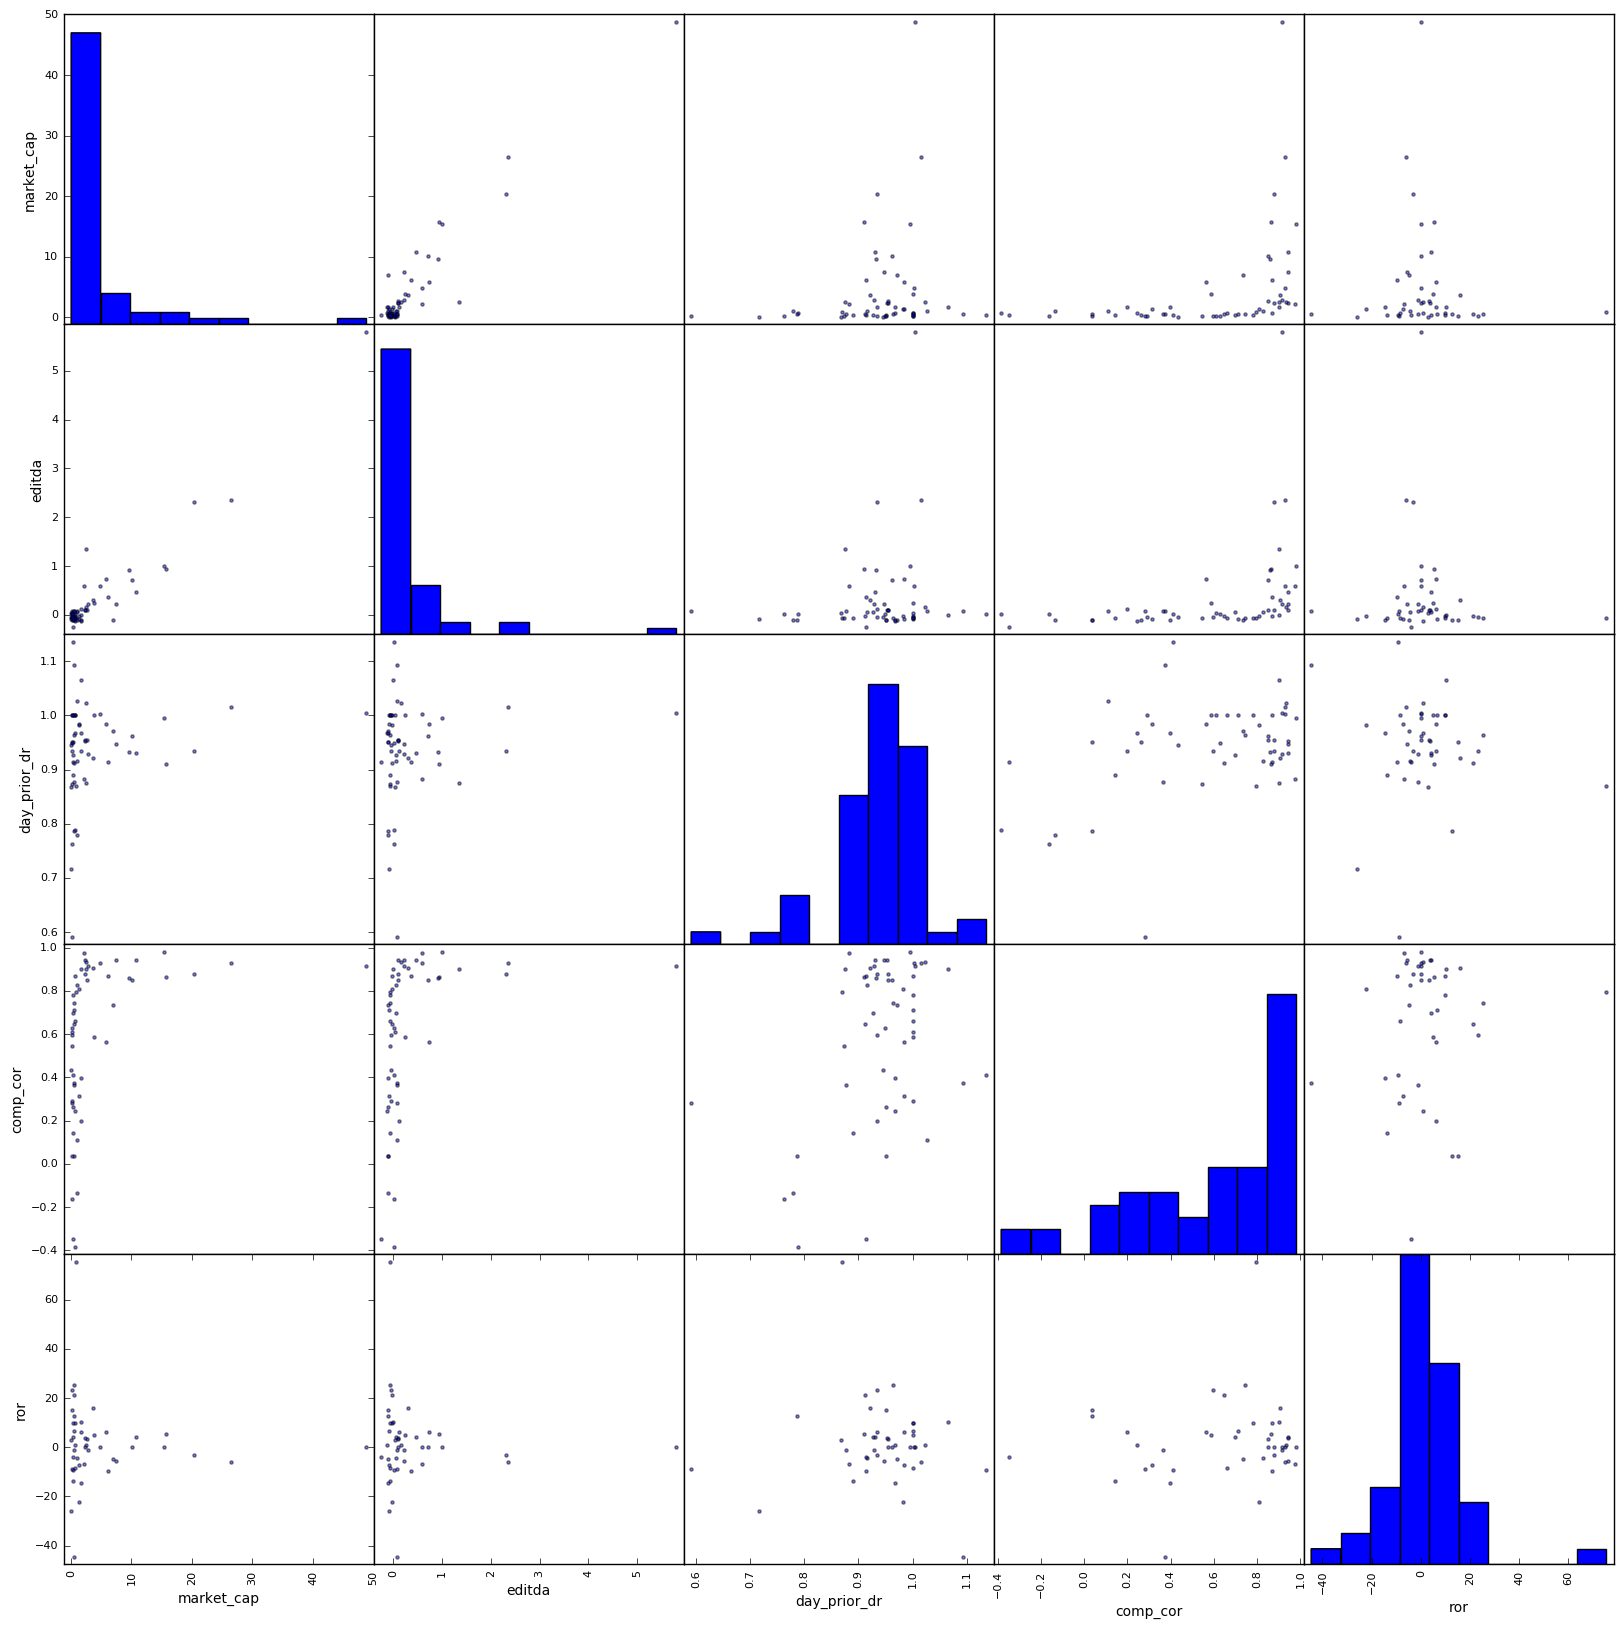

In [205]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(fundamentals, figsize=[20,20])

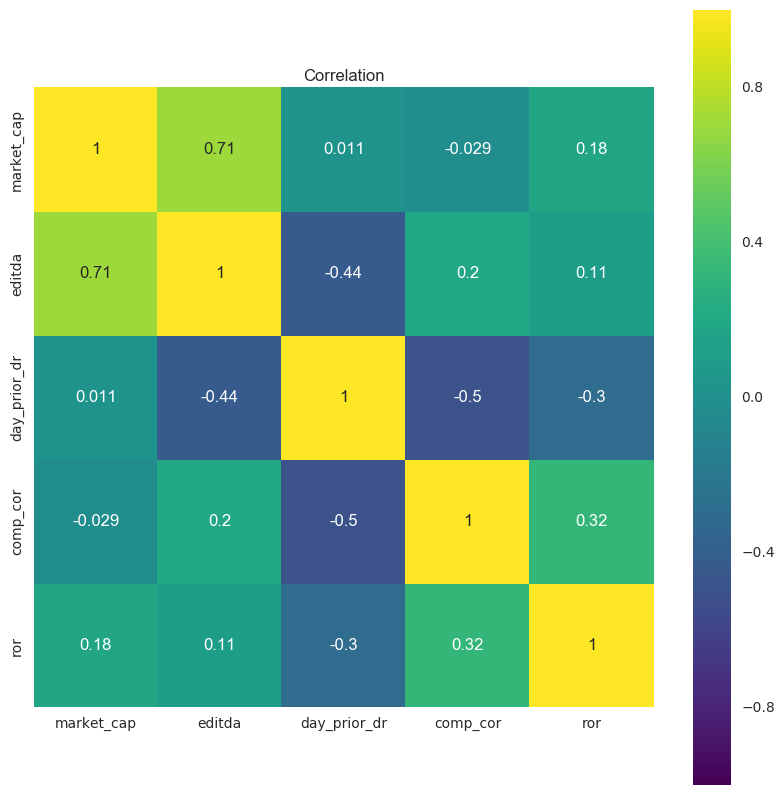

In [232]:
import seaborn as sns
fun_correlation= fundamentals_masked.corr()
plt.figure(figsize=(10,10))
sns.heatmap(fun_correlation,vmax=1, square =True, annot= True, cmap="viridis")
plt.title("Correlation")

In [ ]:
spread_ratios_masked= spread_ratios.T.loc[fundamentals_masked.index.tolist(), :]
spread_ratios_masked= spread_ratios_masked.T
spread_ratios_masked.head()

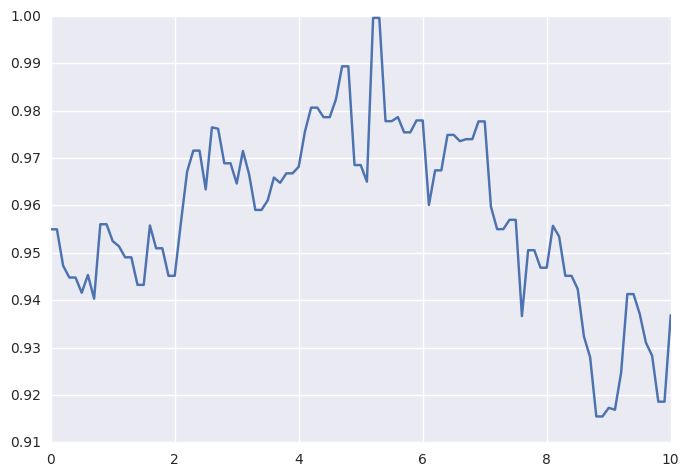

In [386]:
plt.plot(spread_ratios.mean(axis=1))

In [420]:
def vol_window(setup, unwind):
    ror_window = (spread_ratios.loc[spread_ratios.index == setup].divide(spread_ratios.loc[spread_ratios.index == unwind].values)-1)*100
    return (ror_window)
ror_window= vol_window(3.8, 5.6)           

In [426]:
# SETTING ror_window
#fundamentals['ror'] = ror_window.T
fundamentals.to_csv('fundamentals.csv')
fundamentals_masked.to_csv('fundamentals_masked.csv')

In [427]:
fundamentals_masked

,market_cap,editda,day_prior_dr,comp_cor,ror
Company,,,,,
AKS,2.20000,0.60280,0.881764,0.973423,-14.893617
AM,6.16000,0.37060,0.914711,0.868504,-15.384615
AR,7.00000,-0.09816,0.971029,0.735561,-4.854369
COG,10.72000,0.46353,0.930021,0.944150,8.421053
CPE,2.37000,0.10598,0.953216,0.942658,0.754006
DVN,20.35000,2.32000,0.935130,0.878581,-15.238095
EQT,10.05000,0.71958,0.961099,0.849715,4.040404
ESV,2.53000,1.35000,0.875504,0.903115,NaN
FLXN,0.88498,-0.06623,0.870106,0.793663,50.704225


In [423]:
def fun_masking(market_cap,editda,day_prior_dr,comp_cor): 
    fundamentals_masked = fundamentals[fundamentals['comp_cor']>comp_cor]
    fundamentals_masked = fundamentals_masked[fundamentals_masked['ror'] !=0]
    fundamentals_masked = fundamentals_masked[fundamentals_masked['market_cap'] >market_cap]
    fundamentals_masked = fundamentals_masked[fundamentals_masked['editda'] >editda]
    fundamentals_masked = fundamentals_masked[fundamentals_masked['day_prior_dr'] <day_prior_dr]    
    return (fundamentals_masked)
fundamentals_masked= fun_masking(market_cap=.5,editda=-1,day_prior_dr=1,comp_cor=.6)

In [424]:
import statsmodels.api as sm
lm = sm.OLS.from_formula('ror ~ market_cap+editda+day_prior_dr+comp_cor', fundamentals_masked)
result = lm.fit()

In [425]:
# Not the best R^2 but about as expected...only day_prior_dr coeeficient statistically significant. 
# Conclusion: Try another model
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                    ror   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     3.164
Date:                Sun, 16 Apr 2017   Prob (F-statistic):             0.0585
Time:                        15:37:18   Log-Likelihood:                -63.748
No. Observations:                  16   AIC:                             137.5
Df Residuals:                      11   BIC:                             141.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      433.8981    137.511      3.155   

/Users/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


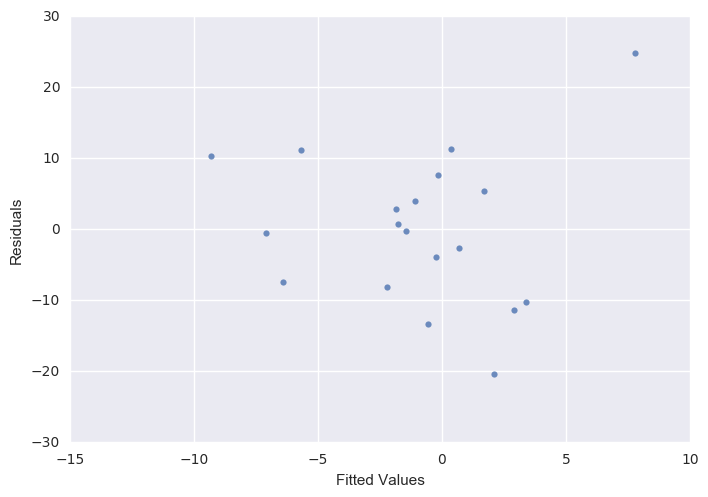

In [409]:
# Possibly a bit of concern here with this general negative trend but otherwise ok
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

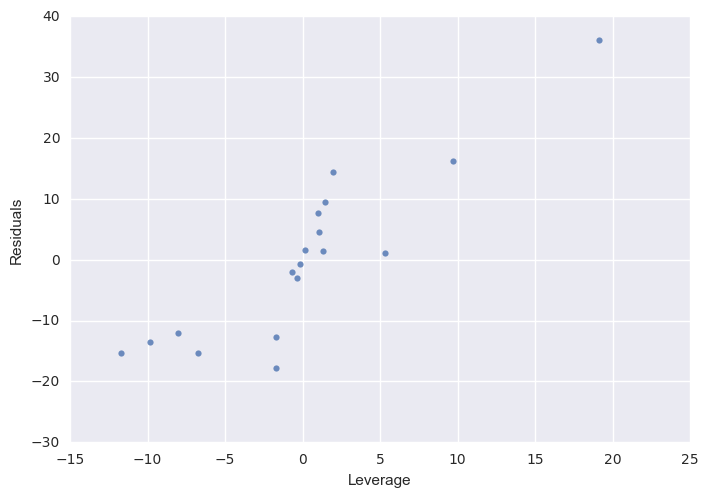

In [402]:
# At least one leverage point
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, residuals,  fit_reg=False)